In [16]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import seaborn as sns

In [2]:
quasar = np.load('../catalogue/quasar_lss_all.npy')

In [3]:
quasar

array([(126.25211624, 46.48639223, 1.64622804, 1.05424748),
       (114.68553182, 31.65789976, 1.87644057, 1.04426213),
       (116.47152209, 33.73896705, 2.02170181, 1.03453257), ...,
       (334.79549919,  3.54413184, 2.0752311 , 1.1012863 ),
       (354.78960605, 10.99911383, 1.7233394 , 1.09604258),
       (  5.62447152, 10.80772102, 1.98792615, 1.21783948)],
      dtype=[('ra', '<f8'), ('dec', '<f8'), ('z', '<f8'), ('w', '<f8')])

In [6]:
coord = SkyCoord(ra=quasar['ra'], dec=quasar['dec'], unit='deg')

In [11]:
l = coord.galactic.l.to('rad').value
b = coord.galactic.b.to('rad').value

phi = l
theta = np.pi/2 - b

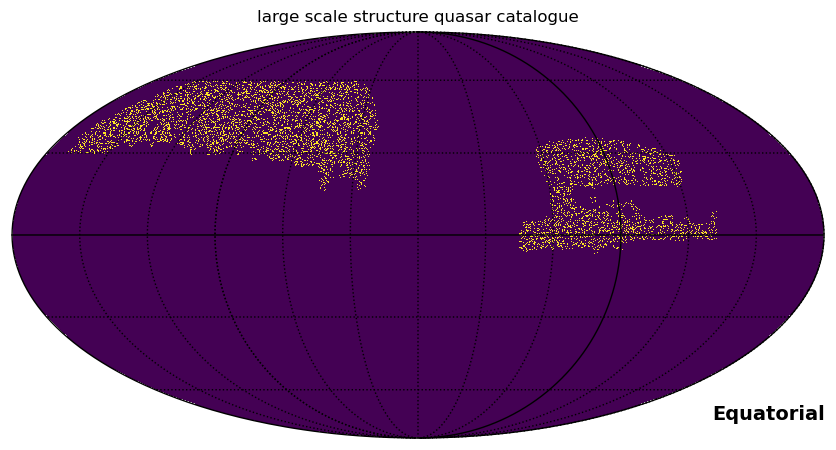

In [15]:
Nside = 1024
image = np.zeros(hp.nside2npix(Nside))
# image[hp.ang2pix(Nside, theta, phi)] = 1
image[hp.ang2pix(Nside, np.deg2rad(90-quasar['dec']), np.deg2rad(quasar['ra']))] = 1

hp.mollview(image, title='large scale structure quasar catalogue', cbar=False, coord='C', rot=(90, 0, 0))
hp.graticule()

Text(0.5, 1.0, 'quasar catalogue redshift distribution')

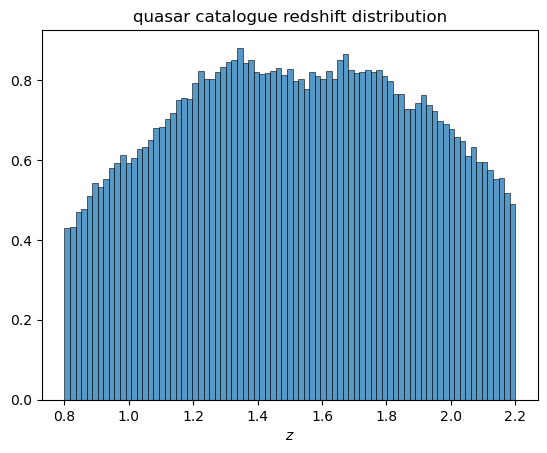

In [18]:
axe = sns.histplot({'z': quasar['z']}, x='z', stat='density')
axe.set_xlabel('$z$')
axe.set_ylabel('')
axe.set_title('quasar catalogue redshift distribution')

In [19]:
from sklearn.neighbors import KDTree
from astropy.io import fits

In [32]:
quasar_SDSS = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/DR16Q_v4.fits')
tree = KDTree(np.c_[quasar_SDSS['RA'], quasar_SDSS['DEC']], metric='euclidean')
que = tree.query(np.c_[quasar['ra'], quasar['dec']])
valid = (que[0] < 5/3600).flatten()
index = que[1].flatten()
M_I = quasar_SDSS['M_I'][index].astype(float)
M_I[~valid] = np.nan

In [36]:
redshift = quasar['z'][valid]
magnitude = M_I[valid]

N = 10000
redshift = np.random.choice(redshift, N)
magnitude = np.random.choice(magnitude, N)

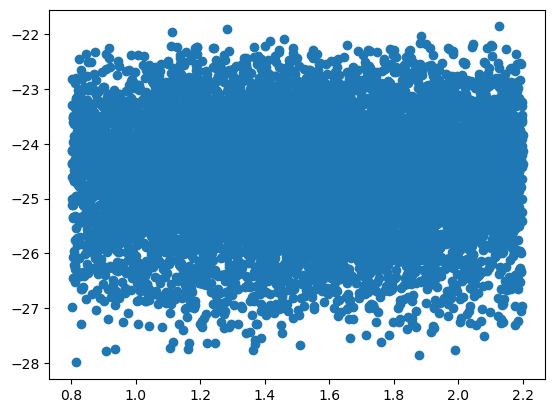

In [37]:
plt.scatter(redshift, magnitude)

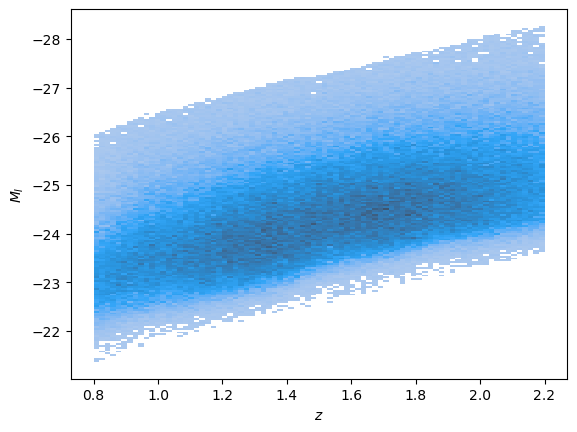

In [38]:
axe = sns.histplot({'Z': quasar['z'][valid], 'M_I': M_I[valid]}, x='Z', y='M_I')
axe.set_xlabel('$z$')
axe.set_ylabel('$M_I$')
axe.invert_yaxis()